In [412]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rice.bmp', cv2.IMREAD_GRAYSCALE)

In [523]:
def clip_histogram(histogram, clip_limit):    
    histogram = np.clip(histogram, 0, clip_limit)
    print(histogram)
    return histogram

def equalization_by_parts(img, div, clip_limit):
    img = img.copy()
    for i in range(0, img.shape[0], div):
        for j in range(0, img.shape[1], div):
            
            block = img[i:i+div, j:j+div]
            hist = cv2.calcHist([block], [0], None, [256], [0, 256]).flatten()
            
            # Faz o clipe nas quantidades maiores que clip_limit no histograma
            hist_clipped = clip_histogram(hist, clip_limit)
           
            # Operação padrão de equalização
            cum_hist = np.cumsum(hist_clipped)
            cum_hist_normalized = cum_hist / cum_hist[-1] * 255
            img[i:i+div, j:j+div] = cum_hist_normalized[block]
    return img


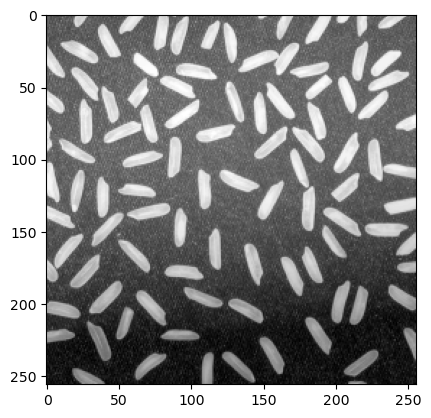

In [522]:
plt.imshow(image, cmap='gray')

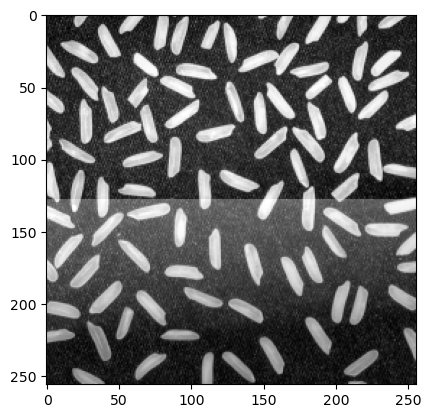

In [496]:
plt.imshow(equalization_by_parts(image, 128, 10), cmap='gray')

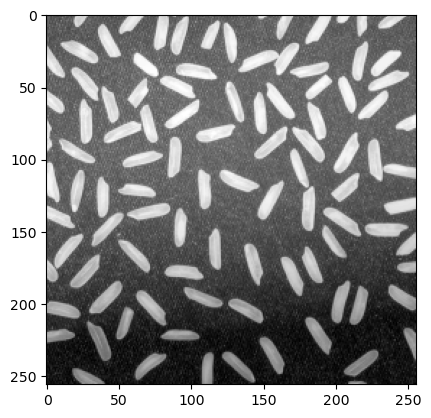

In [497]:
plt.imshow(image, cmap='gray')

In [524]:
eq_image_filter = cv2.medianBlur(image, 5)
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# eq_image_filter = clahe.apply(eq_image_filter)
# eq_image_filter = equalization_by_parts(eq_image_filter)


# eq_image_filter = np.clip(eq_image_filter.astype(np.uint16) + 141, 0, 255) #141
# eq_image_filter = np.clip(eq_image_filter.astype(np.uint16)*0.9, 0, 255).astype(np.uint8) #141

# eq_image_filter = cv2.equalizeHist(eq_image_filter)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  5. 10.  9.  8.  6.  6.  8.
 10.  5.  6.  5.  6.  5.  9. 10.  5. 10.  4.  4.  6.  8. 10.  2.  3.  2.
  7.  1.  4.  3.  5.  0.  7.  3.  2.  3.  4.  4.  5.  8.  5.  1.  3.  2.
  8.  4.  8.  8.  9.  5.  7.  5. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  6.  0.  0.  3.
  2.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

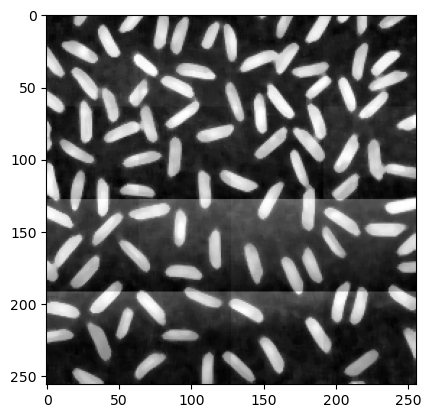

In [525]:
plt.imshow(equalization_by_parts(eq_image_filter, 64, 10), cmap='gray')

In [509]:
# eq_image_filter = cv2.equalizeHist(eq_image_filter)

In [578]:
_, binary_image = cv2.threshold(equalization_by_parts(eq_image_filter, 64, 15), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.  5. 10.  9.  8.  6.  6.  8.
 13.  5.  6.  5.  6.  5.  9. 11.  5. 13.  4.  4.  6.  8. 12.  2.  3.  2.
  7.  1.  4.  3.  5.  0.  7.  3.  2.  3.  4.  4.  5.  8.  5.  1.  3.  2.
  8.  4.  8.  8.  9.  5.  7.  5. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 12.  6.  0.  0.  3.
  2.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

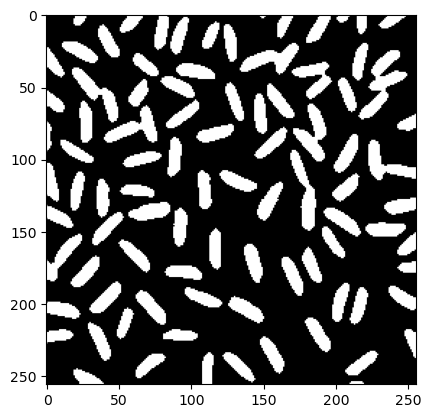

In [579]:
plt.imshow(binary_image, cmap='gray')

In [453]:
kernel = np.array([
    [0,1,1],
    [0,1,1],
    [0,1,1]], dtype=np.uint8)


# MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS

# dil_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))  

kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
# dil_image = cv2.dilate(binary_image, kernel, iterations=1)

dil_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_2)  
# dil_image = cv2.morphologyEx(dil_image, cv2.MORPH_CLOSE, kernel)  


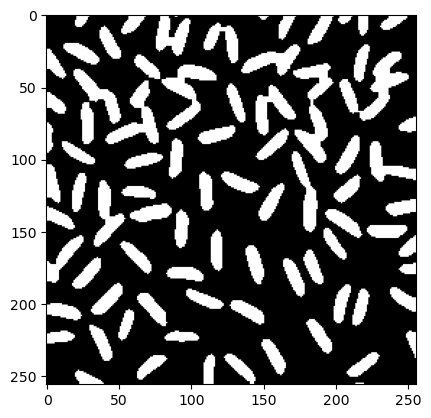

In [454]:
plt.imshow(dil_image, cmap='gray')

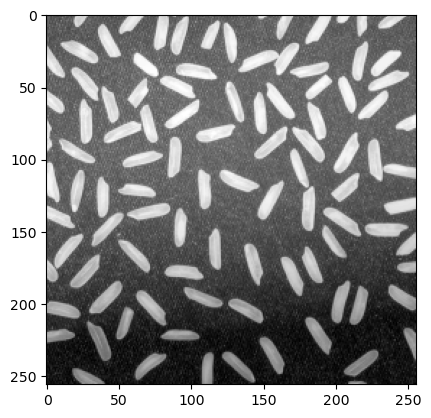

In [714]:
plt.imshow(image, cmap='gray')

In [651]:
sobelx = cv2.Sobel(eq_image_filter, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(eq_image_filter, cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

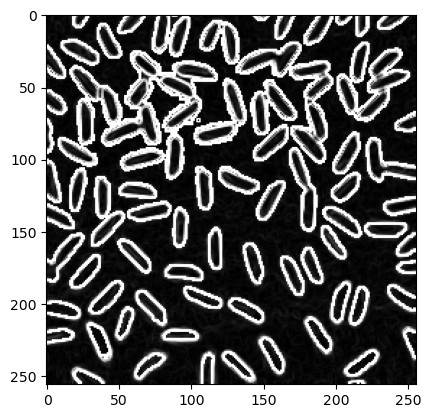

In [652]:
plt.imshow(sobel_combined, cmap='gray')

In [550]:
_, binary_image = cv2.threshold(sobel_combined, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

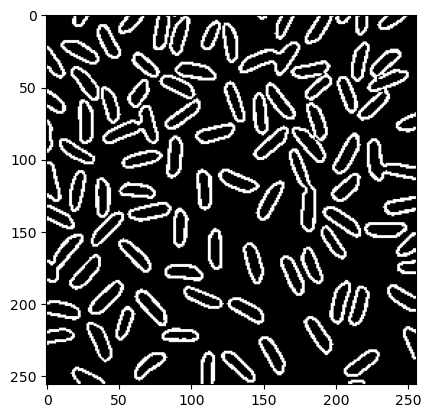

In [551]:
plt.imshow(binary_image, cmap='gray')

In [437]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))

kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]], dtype=np.uint8)

kernel_2  = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
dil_image = cv2.dilate(binary_image, kernel_2, iterations=1)

# dil_image = cv2.morphologyEx(cv2.ximgproc.thinning(binary_image), cv2.MORPH_CLOSE, kernel_2)
# kernel_2  = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12,7))

kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
dil_image = cv2.morphologyEx(dil_image, cv2.MORPH_CLOSE, kernel_3)
# dil_image = cv2.morphologyEx(dil_image, cv2.MORPH_OPEN, kernel_3)


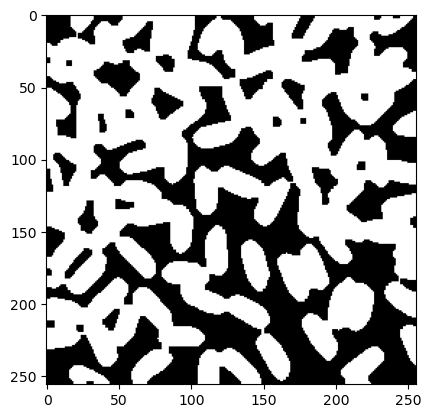

In [438]:
plt.imshow(dil_image, cmap='gray')

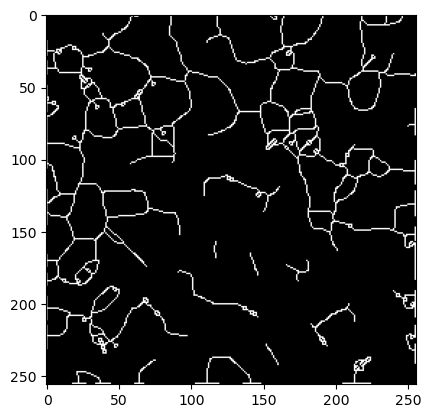

In [307]:
plt.imshow(cv2.ximgproc.thinning(dil_image), cmap='gray')

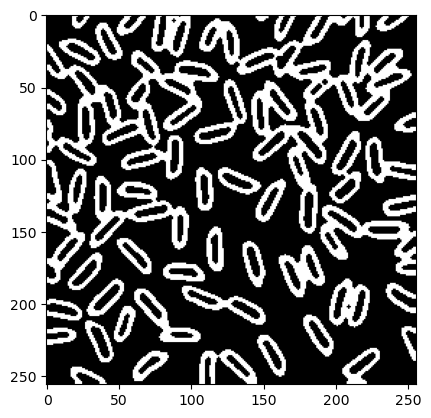

In [289]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
plt.imshow(cv2.morphologyEx(dil_image, cv2.MORPH_CLOSE, kernel), cmap='gray')

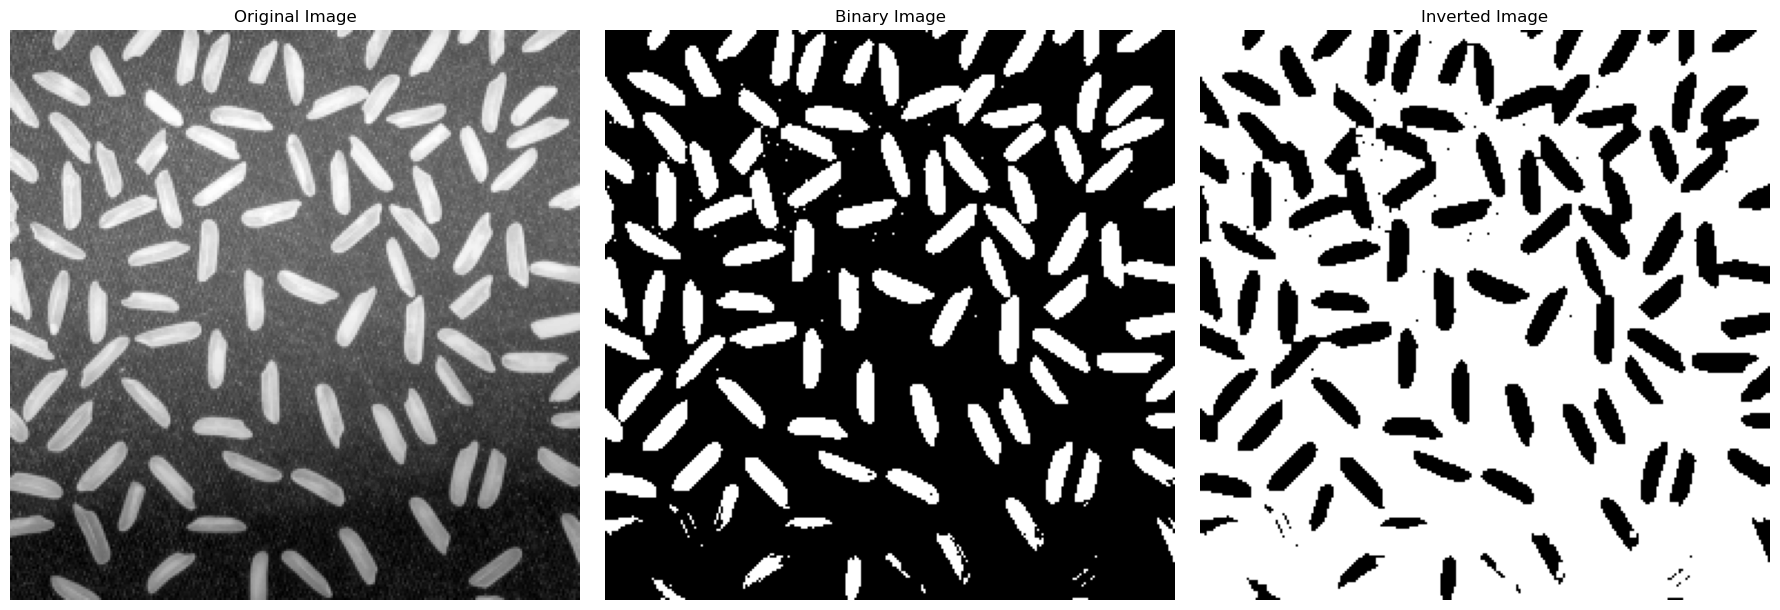

In [192]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Carregar a imagem
image_path = './rice.bmp'
image = Image.open(image_path)
image = np.array(image)

# Converter a imagem para escala de cinza
gray_image = image#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarizar a imagem
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Corrigir falhas e ruídos (usando operações morfológicas)
kernel = np.ones((3,3), np.uint8)
closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Inverter a imagem para que os grãos de arroz fiquem em branco e o fundo em preto
inverted_image = cv2.bitwise_not(closing_image)

# Visualizar a imagem original e a imagem processada
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("Binary Image")

ax[2].imshow(inverted_image, cmap='gray')
ax[2].set_title("Inverted Image")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [448]:
image = cv2.imread('./rice.bmp', cv2.IMREAD_GRAYSCALE)

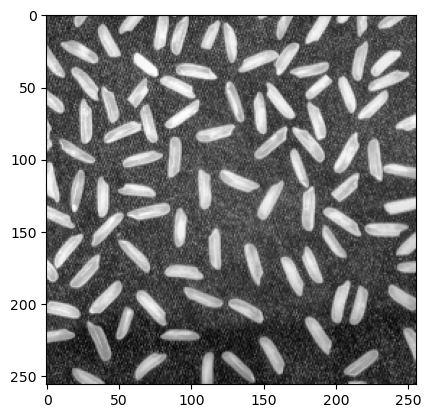

In [474]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_cv = clahe.apply(image)

plt.imshow(contrast_enhanced_cv, cmap='gray')
# plt.imshow(contrast_enhanced_cv, cmap='gray')
# Apply adaptive thresholding
# adaptive_thresh_cv = cv2.adaptiveThreshold(contrast_enhanced_cv, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                                            cv2.THRESH_BINARY, 11, 2)

_, adaptive_thresh_cv = cv2.threshold(contrast_enhanced_cv, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Apply morphological operations
opened = cv2.morphologyEx(adaptive_thresh_cv, cv2.MORPH_OPEN, kernel)
cleaned_image_cv = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# plt.imshow(cleaned_image_cv, cmap='gray')